# Ch2 Understanding relationships between variables

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pollution = pd.read_csv('C:/Users/hp/Documents/Data Science/Machine Learning Time-Series book/data/spm.csv')
pollution.head()

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [3]:
#rename the columns
pollution = pollution.rename(
    columns={
    'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
    'Smoke (Fouquet and DPCC (2011))' : 'Smoke',
    'Entity': 'City'
    }
)
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [4]:
pollution.head()

,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [5]:
#We need to convert Year column from int64 to datetime to help with plotting
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [6]:
# Looking for missing data
pollution.isnull().sum()

City      0
Year      0
Smoke    30
SPM       0
dtype: int64

<AxesSubplot:>

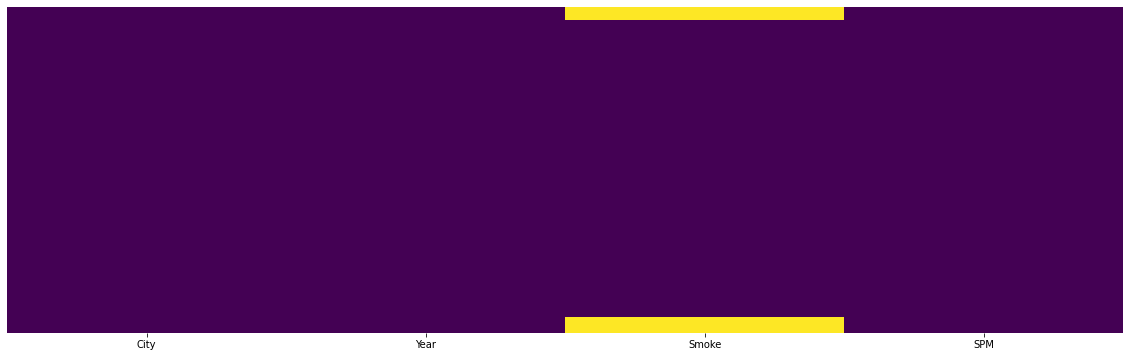

In [7]:
#to visually see the missing cells -- I kind-a love this!
plt.figure(figsize=(20, 6))
sns.heatmap(pollution.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#imputing the mean
pollution.fillna(pollution.mean(), inplace=True)
# count the number of NaN values in each column
print(pollution.isnull().sum())

City     0
Year     0
Smoke    0
SPM      0
dtype: int64


<ipython-input-8-d8c197b7fb5a>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  pollution.fillna(pollution.mean(), inplace=True)


<AxesSubplot:>

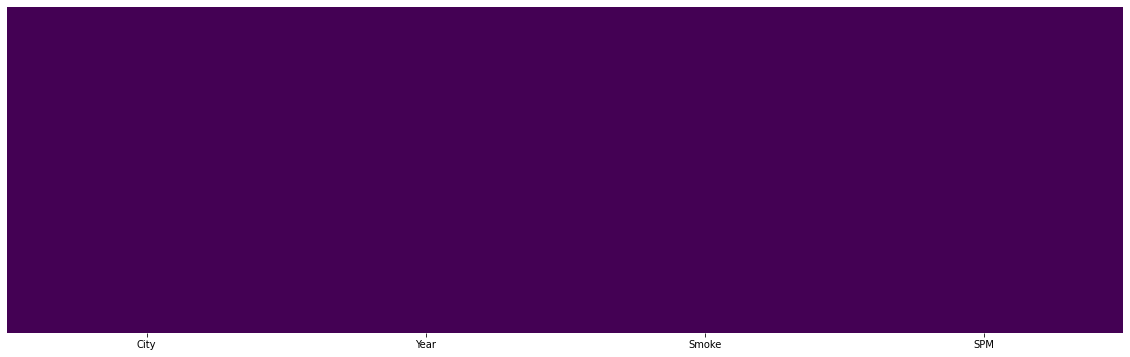

In [9]:
plt.figure(figsize=(20, 6))
sns.heatmap(pollution.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Correlations between Smoke and SPM

In [10]:
# Convert dataframe into series
list1 = pollution['SPM']
list2 = pollution['Smoke']

# Pearson's correlation

In [11]:
stats.pearsonr(list1,list2)
#First value is Pearsons correlation
#Second value is p value

(0.8897655884569478, 4.204118184775438e-114)

In [12]:
#So from above, p is 0.00 which means signifigance
# SPM is significantly, and strongly correlated with Smoke-- almost identical

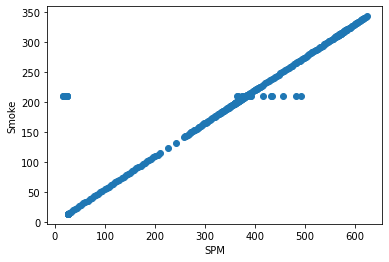

In [13]:
#to create a scatterplot of SPM and Smoke
plt.scatter(list1, list2)
plt.xlabel("SPM")
plt.ylabel("Smoke")
plt.show()

# Plotting one variable over time

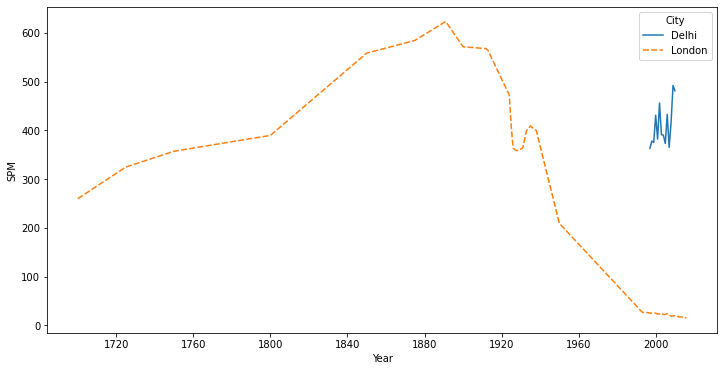

In [14]:
#to plot SPM, or Suspended Particulate Matter, over time
pollution = pollution.pivot("Year", "City", "SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

In [15]:
# You can see a positive trend from 1700 - 1880
# Then a downward trend from 1880-2000

# Autocorrelation
## the correlation of a signal with a lagged version of itself
## can help find repeating patterns

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

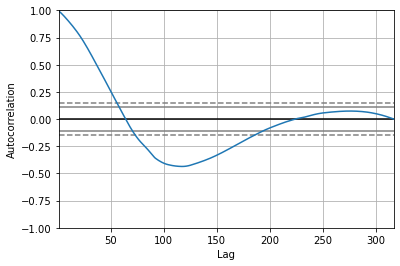

In [20]:
## Autocorrelation pollution from London
pd.plotting.autocorrelation_plot(pollution['London'])

In [21]:
#Since the autocorrelation is not flat, we can say SPM is not a stationary process

# Statistical test for stationary is augmented Dickey-Fuller test

In [22]:
from statsmodels.tsa import stattools

stattools.adfuller(pollution['London'])

(-0.33721640804243147,
 0.9200654843183893,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

In [ ]:
# The second return value is the p-value
# With p-values below 5% or 0.05 we would typically reject the null hypothesis, and
# we could assume that our time-series is stationary. 
# In our case, we can't assume that the series is stationary.